<a href="https://colab.research.google.com/github/Ricardojnf33/Time_series/blob/main/Atividade_3_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das bibliotecas

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 46.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 6.4 MB 5.7 MB/s 
     |████████████████████████████████| 63 kB 873 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.

# Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

import pmdarima as pm
from pmdarima.arima import KPSSTest
from pmdarima.arima import auto_arima
print(f"Using pmdarima {pm.__version__}")
# Using pmdarima 1.5.2

Using pmdarima 1.8.5


# Carregamento do Dataset

https://alkaline-ml.com/pmdarima/usecases/stocks.html

In [4]:
from pmdarima.datasets.stocks import load_msft

df = load_msft()
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [5]:
df.set_index('Date', inplace=True) #Resetando Index

In [6]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [7]:
df.shape

(7983, 6)

In [8]:
df['Close'].describe()

count    7983.000000
mean       18.984698
std        16.424012
min         0.067200
25%         2.113300
50%        20.469000
75%        25.483500
max        84.560000
Name: Close, dtype: float64

In [9]:
plt.rcParams["figure.figsize"] = (20,10)

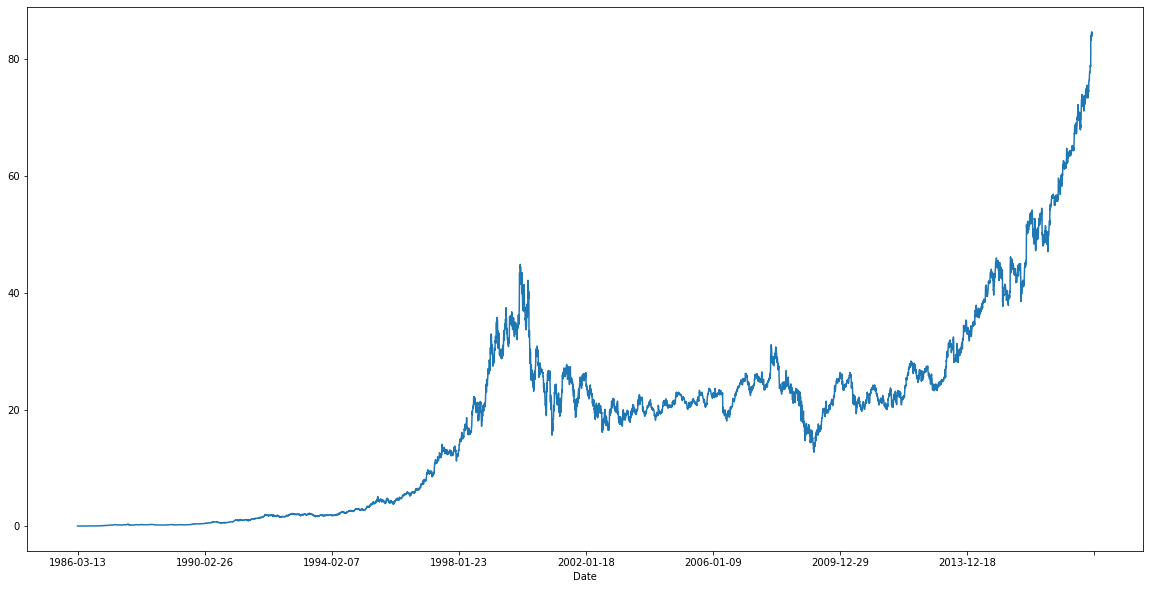

In [10]:
df['Close'].plot()

In [11]:
df['Close'].ffill(inplace=True) # Replce empty numbers

# Média Móvel

In [12]:
example = df['Close']
ma_size = 2

for i in range(ma_size, len(example)):
  consider_val = example[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}')

A saída de streaming foi truncada nas últimas 5000 linhas.
valores considerados: Date
2012-11-23    24.375
2012-11-26    24.102
Name: Close, dtype: float64, MA 24.238500000000002
valores considerados: Date
2012-11-26    24.102
2012-11-27    23.830
Name: Close, dtype: float64, MA 23.966
valores considerados: Date
2012-11-27    23.830
2012-11-28    24.076
Name: Close, dtype: float64, MA 23.953
valores considerados: Date
2012-11-28    24.076
2012-11-29    23.716
Name: Close, dtype: float64, MA 23.896
valores considerados: Date
2012-11-29    23.716
2012-11-30    23.416
Name: Close, dtype: float64, MA 23.566000000000003
valores considerados: Date
2012-11-30    23.416
2012-12-03    23.260
Name: Close, dtype: float64, MA 23.338
valores considerados: Date
2012-12-03    23.260
2012-12-04    23.206
Name: Close, dtype: float64, MA 23.233
valores considerados: Date
2012-12-04    23.206
2012-12-05    23.470
Name: Close, dtype: float64, MA 23.338
valores considerados: Date
2012-12-05    23.470
2012-

In [13]:
def show_trend(consider_val, ma_size):
  df_serie = pd.DataFrame()
  df_serie['serie'] = df['Close'].values[ma_size:]
  df_serie['MA'] = consider_val.rolling(ma_size).mean().values[ma_size:]

  df_serie.plot()

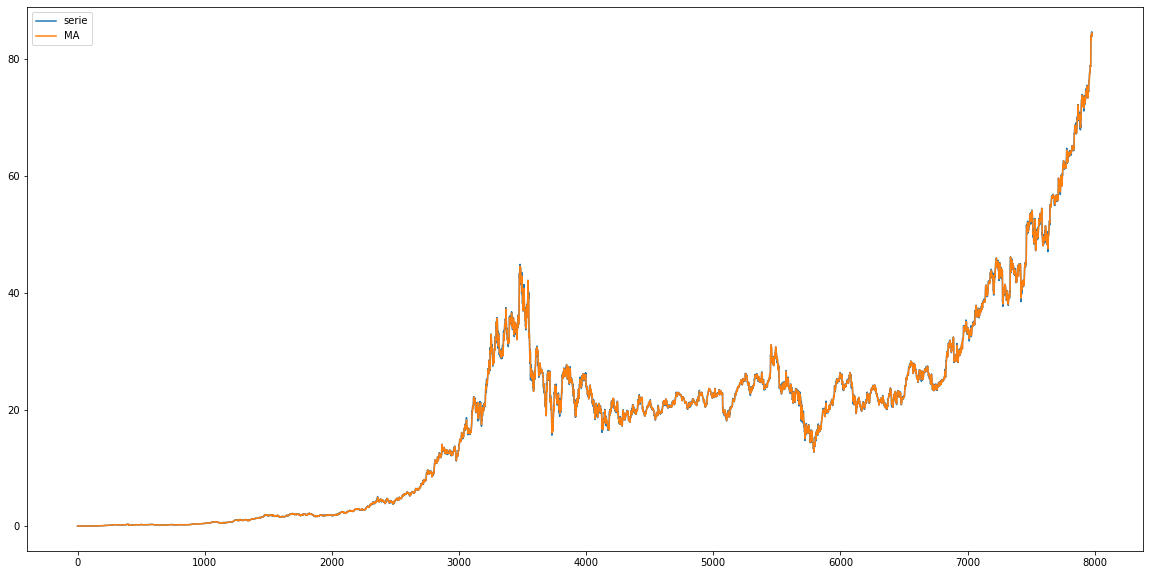

In [14]:
show_trend(df['Close'], ma_size)

## Plotando gráfico de auto-correlação e auto-correlação parcial

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

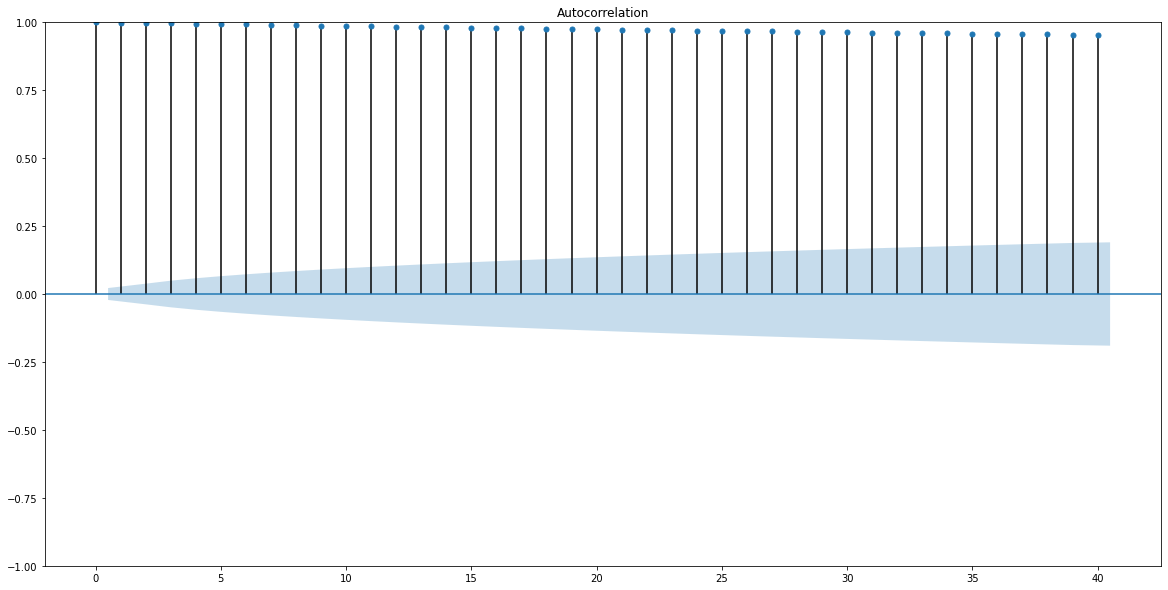

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


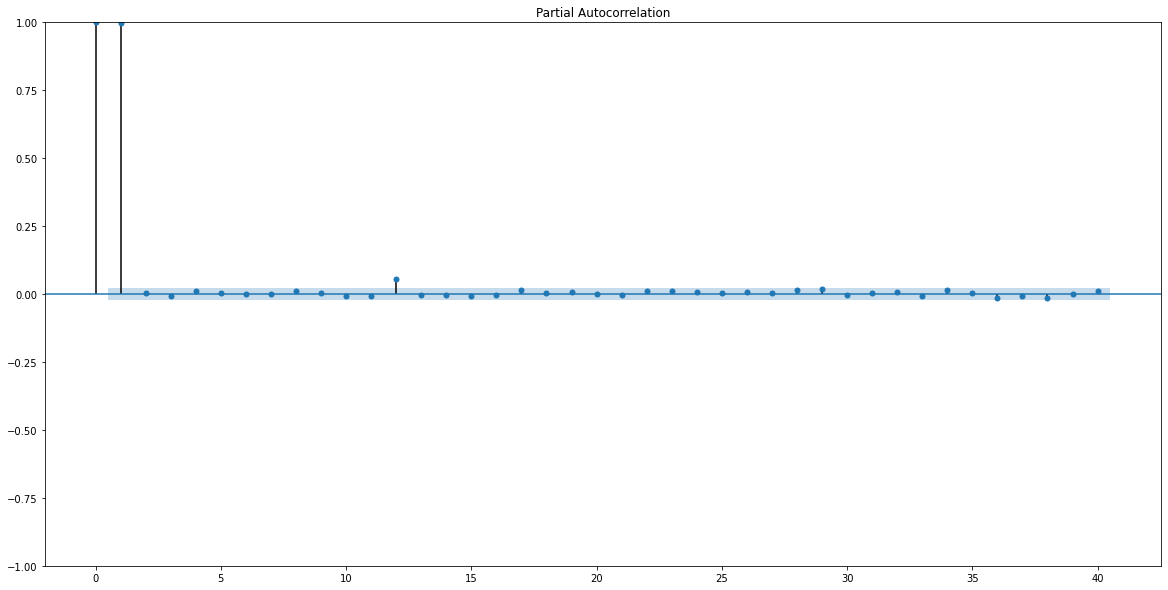

In [16]:
plot_acf(df['Close'])
plt.show()
plot_pacf(df['Close'])
plt.show()

In [17]:
df['Close'].describe()

count    7983.000000
mean       18.984698
std        16.424012
min         0.067200
25%         2.113300
50%        20.469000
75%        25.483500
max        84.560000
Name: Close, dtype: float64

# Teste KPSS

In [18]:
kpss = KPSSTest()

kpss.should_diff(df['Close'].ffill())

(0.01, True)

In [19]:
df['Close'].isna().value_counts(normalize=True)

False    1.0
Name: Close, dtype: float64

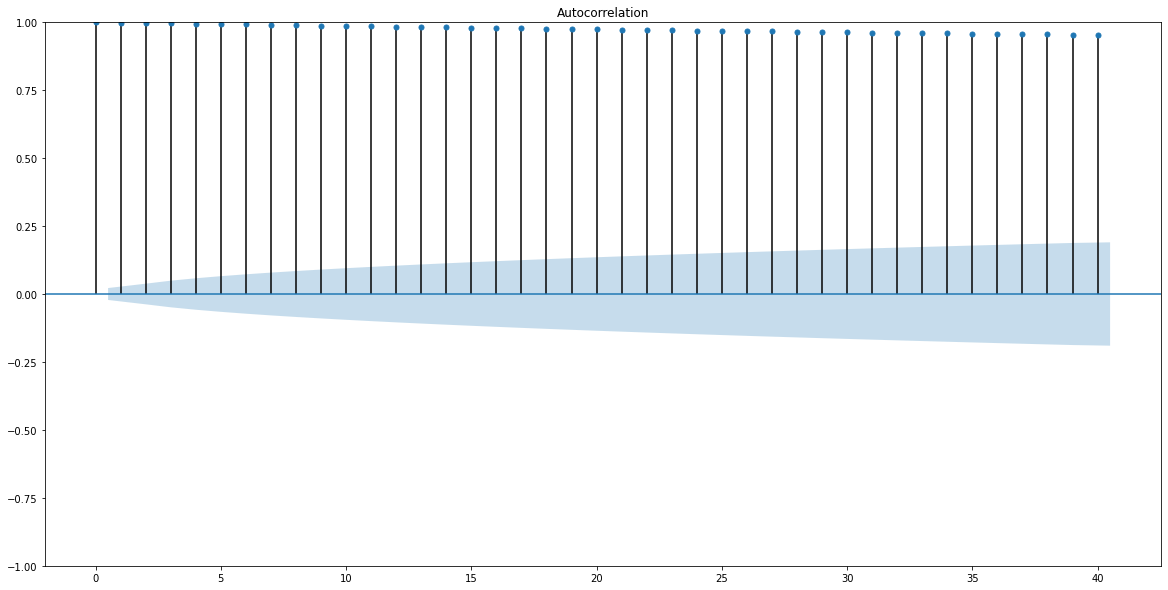

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


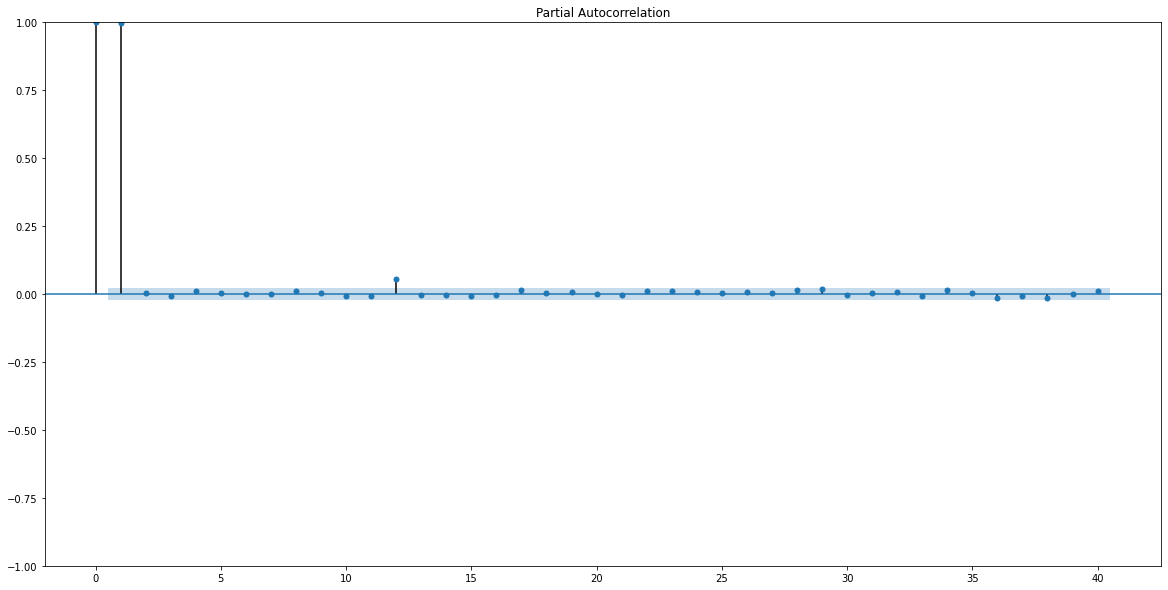

In [20]:
plot_acf(df['Close'])
plt.show()
plot_pacf(df['Close'])
plt.show()

# Aplicando diferenciação

In [21]:
def get_diff(dataset, interval=1):
  diff = list()

  for i in range(interval, dataset.shape[0]):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)

  return pd.Series(diff)

df_diff = get_diff(df['Close'], 1) 

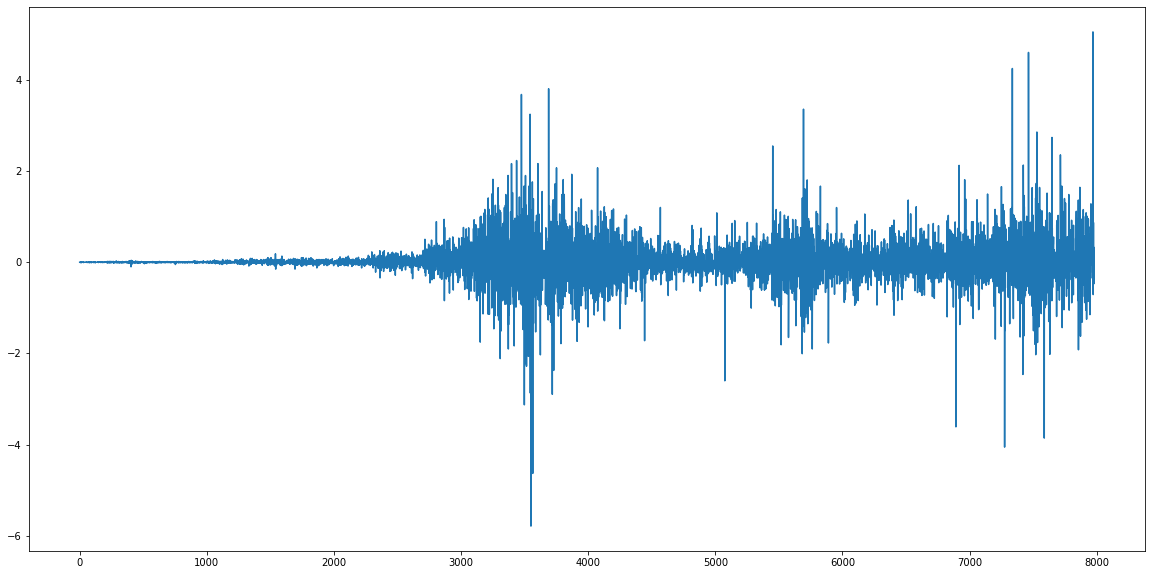

In [22]:
df_diff.plot()
plt.show()

## Novo teste KPSS

In [23]:
kpss = KPSSTest()

kpss.should_diff(df_diff)

(0.03618638431819079, True)

## Novo plot de auto-correlação

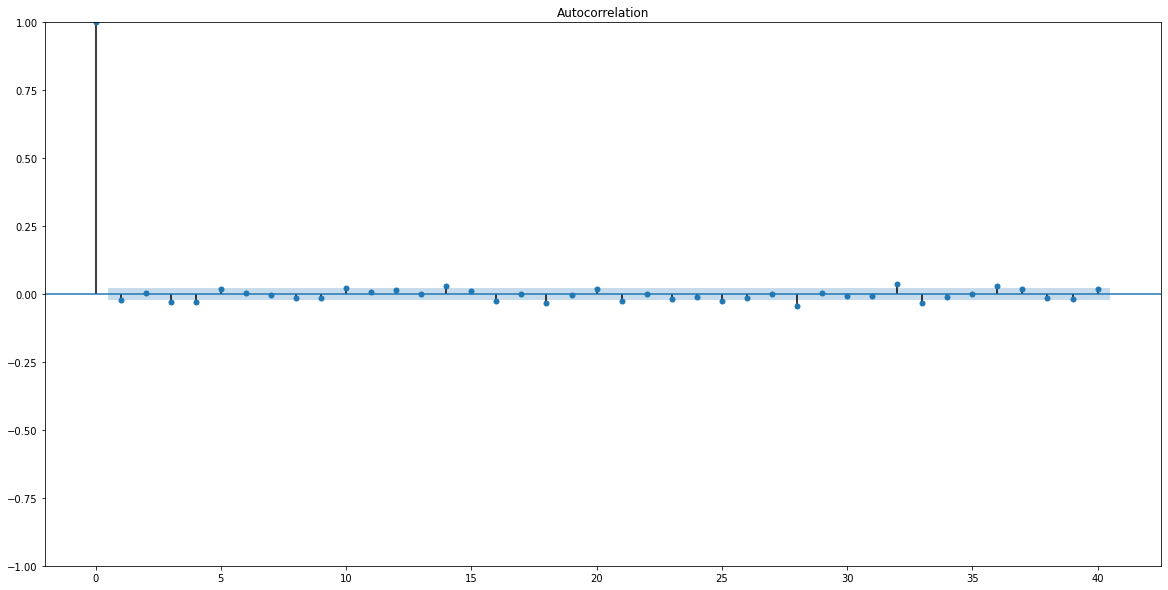

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


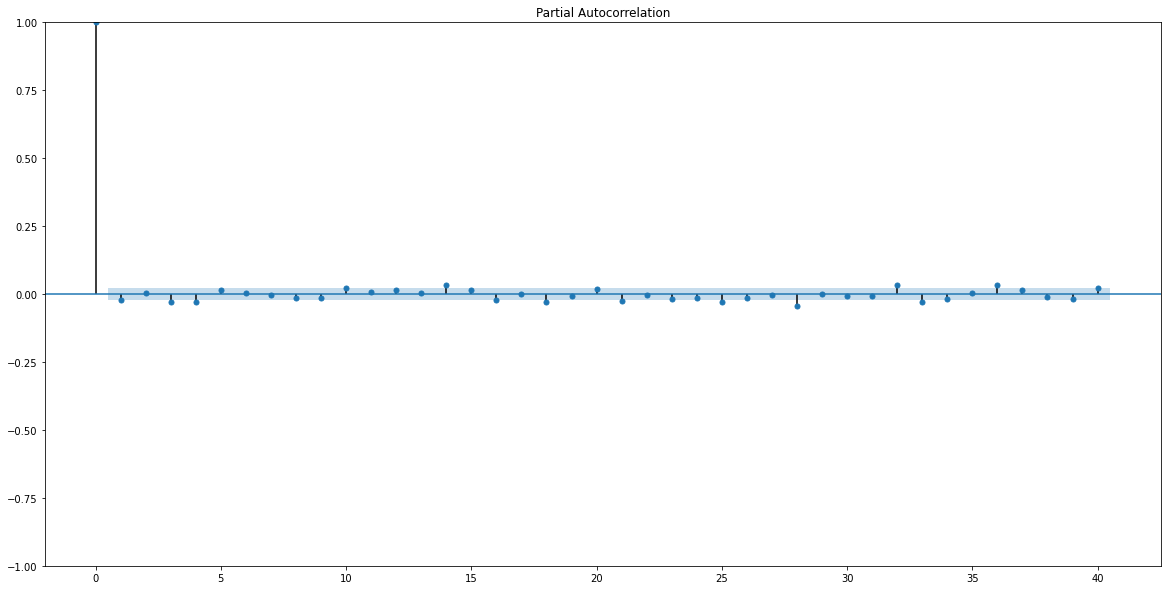

In [24]:
plot_acf(df_diff)
plt.show()
plot_pacf(df_diff)
plt.show()

In [25]:
df.head()

#df['Date'] = pd.to_datetime(df['Date'])

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [26]:
serie = df['Close']
serie.shape

(7983,)

In [27]:
serie = serie.apply(lambda x: 0 if pd.isna(x) else float(x))

# Implementação do modelo ARIMA / m=1

In [28]:
auto_arima(serie, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14907.055, Time=0.90 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=12487.766, Time=0.40 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.91 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=11639.961, Time=0.88 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=11164.528, Time=1.38 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=10731.421, Time=2.43 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=10482.093, Time=2.50 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=9454.290, Time=4.16 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=9551.488, Time=1.91 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=9333.520, Time=2.54 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=2.13 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=9462.984, Time=3.13 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=9529.500, Time=2.43 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=

ARIMA(maxiter=10, order=(5, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Implementação do modelo ARIMA / m=4

In [29]:
model = auto_arima(serie, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=4, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=inf, Time=2.75 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=14907.055, Time=0.34 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=12483.493, Time=0.76 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=9305.740, Time=1.35 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=inf, Time=0.80 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=9403.199, Time=1.55 sec
 ARIMA(0,2,1)(0,0,2)[4]             : AIC=9272.238, Time=2.27 sec
 ARIMA(0,2,1)(1,0,2)[4]             : AIC=9328.761, Time=2.86 sec
 ARIMA(0,2,0)(0,0,2)[4]             : AIC=14906.813, Time=1.32 sec
 ARIMA(1,2,1)(0,0,2)[4]             : AIC=9407.294, Time=2.67 sec
 ARIMA(0,2,2)(0,0,2)[4]             : AIC=9338.326, Time=3.11 sec
 ARIMA(1,2,0)(0,0,2)[4]             : AIC=12481.551, Time=1.52 sec
 ARIMA(1,2,2)(0,0,2)[4]             : AIC=9268.718, Time=3.30 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=inf, Time=2.05 sec
 ARIMA(1,2,2)(1,0,2)[4]             : AIC=92

# Aplicação do Predict nos proximos 10 dias

In [30]:
model.predict(10)

array([84.012286  , 84.12788411, 84.27872053, 84.42870576, 84.56328901,
       84.69353419, 84.83251019, 84.97314702, 85.10552432, 85.23997663])

In [31]:
serie.shape

(7983,)

## Separação de 10% para test e 90% train

In [32]:
test_size = int(serie.shape[0] * 0.1)

In [33]:
train = serie.iloc[0:-test_size] # iloc do dado mais antigo, até o início de test_size = train
test = serie.iloc[-test_size:] # iloc do Início de test_size até o final = test 

## Modelo Auto_arima setado em train / m=4

In [34]:
model = auto_arima(train, #X=None,
           start_p=2, d=None, start_q=2,
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=4, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=6753.333, Time=6.02 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=6757.471, Time=0.60 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=6744.262, Time=2.13 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=6744.294, Time=2.39 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=6757.199, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=6754.058, Time=1.05 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=6746.155, Time=3.21 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=6746.513, Time=3.05 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=6744.222, Time=2.17 sec
 ARIMA(1,1,0)(0,0,2)[4] intercept   : AIC=6746.220, Time=3.53 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=6746.216, Time=5.09 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=6747.613, Time=1.75 sec
 ARIMA(2,1,0)(0,0,1)[4] intercept   : AIC=6745.845, Time=2.55 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=6744.264, Time=3.61 sec
 ARIMA(2,1,1)(0,0,1)[4] intercept

### Perseguir test, aplicar o predict e atualizar o modelo com o último valor predito 

In [35]:
test_prevs_h1 = []

for t in test:
    test_prevs_h1.append(model.predict(1)[0])
    model.update(t)

In [36]:
model.predict(1)[0]

83.86956874903478

## Test tqdm

In [37]:
pip install tqdm

In [38]:
from tqdm import tqdm

In [39]:
test_prevs_h1 = []

for t in tqdm(test):
    test_prevs_h1.append(model.predict(1)[0])
    model.update(t)

100%|██████████| 798/798 [12:18<00:00,  1.08it/s]


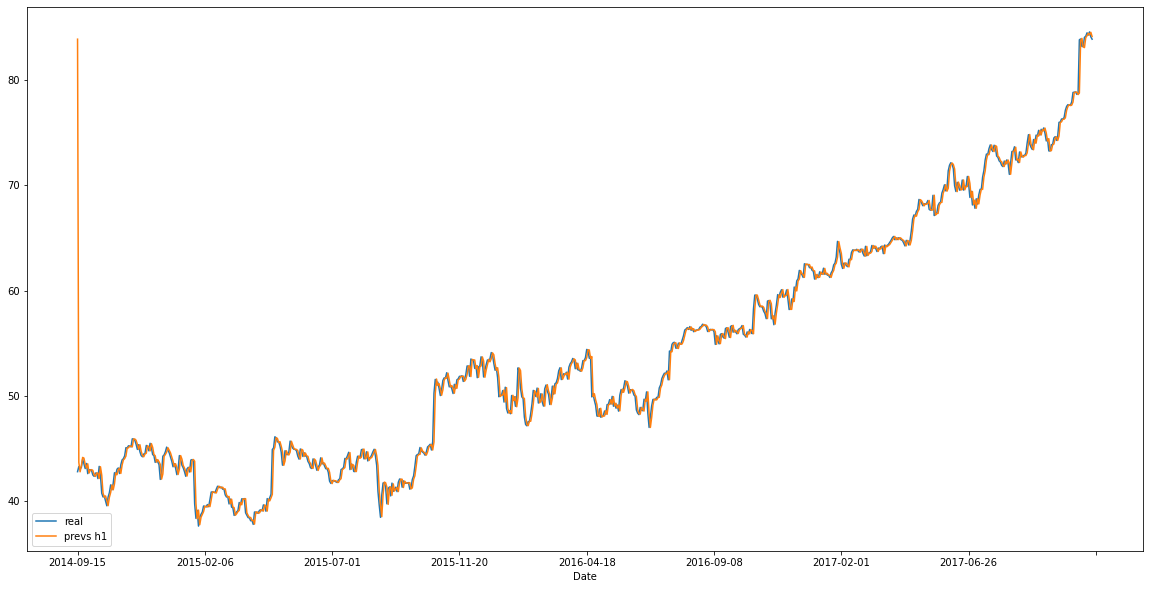

In [40]:
pd.DataFrame({'real': test, 'prevs h1': test_prevs_h1}).plot()

## Teste MSE

In [41]:
def mean_square_error(y_true, y_pred):
    y_true = np.asmatrix(y_true).reshape(-1)
    y_pred = np.asmatrix(y_pred).reshape(-1)

    return np.square(np.subtract(y_true, y_pred)).mean()

mean_square_error(test, test_prevs_h1)

2.6229944997180135

In [42]:
test_prevs_h300 = model.predict(test_size)

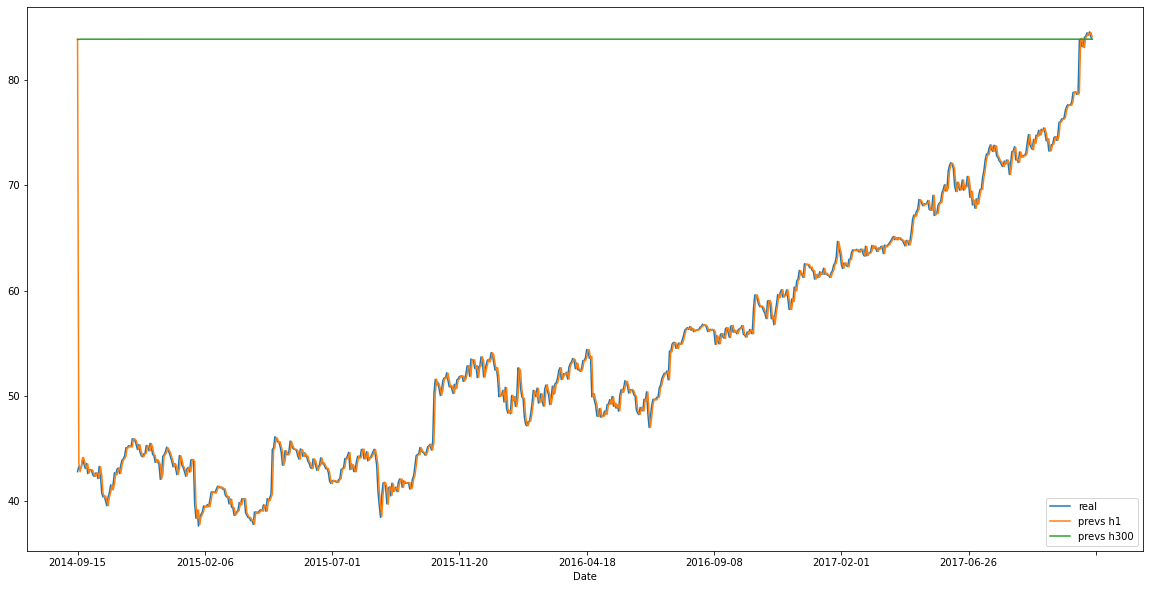

In [43]:
pd.DataFrame({'real': test, 'prevs h1': test_prevs_h1,  'prevs h300': test_prevs_h300}).plot()

In [44]:
mean_square_error(test, test_prevs_h300)

1017.8248592542724

## teste U_theil

In [45]:
def u_theil(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    error_sup = np.square(np.subtract(y_true, y_pred)).sum()
    error_inf = np.square(np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])).sum()

    return error_sup / error_inf

In [46]:
u_theil(test, test_prevs_h1)

1.0389950716841245

In [47]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [48]:
df.reset_index(inplace=True)

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df.set_index('Date', inplace=True)

In [51]:
df = df[['Close']]

In [52]:
df.index.min()

Timestamp('1986-03-13 00:00:00')

## Configurando datas para aplicação do modelo

In [53]:
dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
dates = pd.DataFrame({'Date': dates}).set_index('Date')

In [54]:
df = dates.join(df, how='left')

In [55]:
pd.isna(df['Close']).value_counts(normalize=True)

False    0.966231
True     0.033769
Name: Close, dtype: float64

In [56]:
df1 = pd.DataFrame({'date':pd.date_range(start=df.index.min(), end=df.index.max(), freq='M')})

In [57]:
df1['date'].shift(0)

0     1986-03-31
1     1986-04-30
2     1986-05-31
3     1986-06-30
4     1986-07-31
         ...    
375   2017-06-30
376   2017-07-31
377   2017-08-31
378   2017-09-30
379   2017-10-31
Name: date, Length: 380, dtype: datetime64[ns]

In [58]:
def creating_windowing(df1, lag_size):
  all_series = []
  for i in reversed(range(0, lag_size+1)):
    serie = df.shift(i)
    if i==0:
      serie.columns= ['actual']
    else:
      serie.columns= [f'lag_{i}']

    all_series.append(serie)

  df_lagged = pd.concat(all_series, axis=1)
  df_lagged.dropna(inplace=True)

  return df_lagged

In [72]:
creating_windowing(df1, 3)

,lag_3,lag_2,lag_1,actual
Date,,,,
1986-03-18,0.07533,0.07533,0.07533,0.07533
1986-03-19,0.07533,0.07533,0.07533,0.07533
1986-03-20,0.07533,0.07533,0.07533,0.07533
1986-03-21,0.07533,0.07533,0.07533,0.06720
1986-03-24,0.07533,0.07533,0.06720,0.06720
...,...,...,...,...
2017-11-06,83.18000,84.05000,84.14000,84.47000
2017-11-07,84.05000,84.14000,84.47000,84.26000
2017-11-08,84.14000,84.47000,84.26000,84.56000


In [73]:
lag_size = 3
horizon = 2
df_lagged = creating_windowing(df1, lag_size+horizon-1)

In [74]:
labels_lags = [f'lag_{c}'for c in reversed(range(1, lag_size+1))]
labels_horizons = [f'target_{c}'for c in (range(1, horizon+1))]

In [75]:
df_lagged.columns = labels_lags + labels_horizons

In [76]:
df_lagged.drop(columns=['target_1'])

,lag_3,lag_2,lag_1,target_2
Date,,,,
1986-03-19,0.07533,0.07533,0.07533,0.07533
1986-03-20,0.07533,0.07533,0.07533,0.07533
1986-03-21,0.07533,0.07533,0.07533,0.06720
1986-03-24,0.07533,0.07533,0.07533,0.06720
1986-03-25,0.07533,0.07533,0.06720,0.06720
...,...,...,...,...
2017-11-06,83.18000,83.18000,84.05000,84.47000
2017-11-07,83.18000,84.05000,84.14000,84.26000
2017-11-08,84.05000,84.14000,84.47000,84.56000


# Setando modelo MLPRegressor

In [77]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [78]:
df_lagged['lag_1']

Date
1986-03-19     0.07533
1986-03-20     0.07533
1986-03-21     0.07533
1986-03-24     0.07533
1986-03-25     0.06720
                ...   
2017-11-06    84.05000
2017-11-07    84.14000
2017-11-08    84.47000
2017-11-09    84.26000
2017-11-10    84.56000
Name: lag_1, Length: 6883, dtype: float64

In [91]:
df_lagged2 = df_lagged.drop(columns=['target_2', 'target_1'])
X = df_lagged2.to_numpy()
X

array([[7.533e-02, 7.533e-02, 7.533e-02],
       [7.533e-02, 7.533e-02, 7.533e-02],
       [7.533e-02, 7.533e-02, 7.533e-02],
       ...,
       [8.405e+01, 8.414e+01, 8.447e+01],
       [8.414e+01, 8.447e+01, 8.426e+01],
       [8.447e+01, 8.426e+01, 8.456e+01]])

In [93]:
y = df_lagged['target_2']
y

Date
1986-03-19     0.07533
1986-03-20     0.07533
1986-03-21     0.06720
1986-03-24     0.06720
1986-03-25     0.06720
                ...   
2017-11-06    84.47000
2017-11-07    84.26000
2017-11-08    84.56000
2017-11-09    84.09000
2017-11-10    83.87000
Name: target_2, Length: 6883, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X , y)

regr = MLPRegressor(max_iter=500).fit(X_train, y_train)

In [106]:
regr.predict(X_test[:10])

array([ 0.25353505,  0.68463736, 24.86512404, 22.17472316, 19.4334057 ,
       53.27332748, 24.30918842,  0.32169234, 33.66224972, 21.48759864])

In [108]:
 regr.score(X_test, y_test)

0.9988284980359028